In [1]:
import pandas as pd
import plotly.express as px

/tmp/ipykernel_8137/4196700174.py:60: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



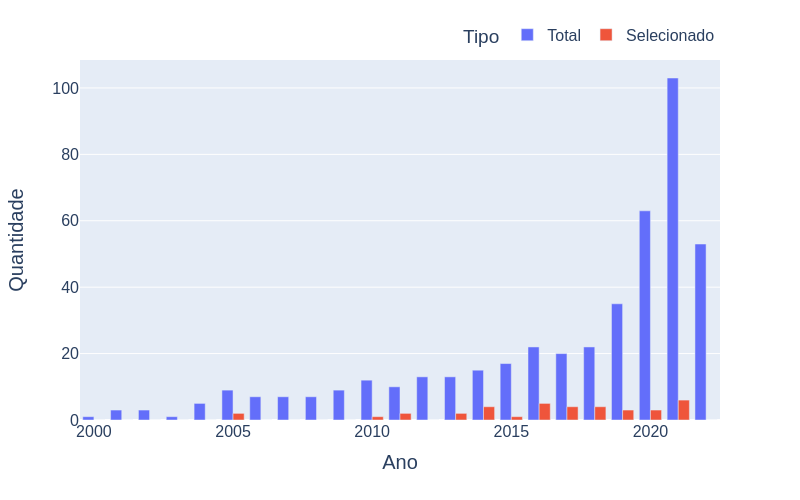

In [3]:
data = {2000: 1,
2001: 3,
2002: 3,
2003: 1,
2004: 5,
2005 : 9,
2006 : 7,
2007 : 7,
2008 : 7,
2009 : 9,
2010 : 12,
2011 : 10,
2012 :  13,
2013 : 13,
2014 : 15,
2015 : 17,
2016 :  22,
2017 : 20,
2018 :  22,
2019 : 35,
2020 : 63,
2021 : 103,
2022 :  53}
data = pd.DataFrame([data])
data = data.T
data.columns = ['Quantity']
data['Year'] = data.index
data['Tipo'] = 'Total'
data.reset_index(inplace=True)

data1 = {2000: 0,
2001: 0,
2002: 0,
2003: 0,
2004: 0,
2005 : 2,
2006: 0,
2007: 0,
2008: 0,
2009: 0,
2010 : 1,
2011 : 2,
2012: 0,
2013 : 2,
2014 : 4,
2015 : 1,
2016 :  5,
2017 : 4,
2018 :  4,
2019 : 3,
2020 : 3,
2021 : 6,
2022 : 0}
data1 = pd.DataFrame([data1])
data1 = data1.T
data1.columns = ['Quantity']
data1['Year'] = data1.index
data1['Tipo'] = 'Selecionado'
data1.reset_index(inplace=True)
data = data.append(data1)

data2 = data.copy()
data2.reset_index(inplace=True)
# data2['type'] = ['All', 'Selected']
fig = px.bar(data2, x= 'Year', y = 'Quantity',  color='Tipo', barmode='group')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    yaxis=dict(
        title_text="Quantidade",
        titlefont=dict(size=20),
    ),
    xaxis=dict(
        title_text="Ano",
        titlefont=dict(size=20),
    ),
    font=dict(
            size=16,
        )
)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show(renderer="png", width=800,
    height=500)

In [2]:
def readMLMethods(sheet_id, sheet_name):
    url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
    df = pd.read_csv(url).fillna(0)
    df.columns = ['Methods', 'Total','FS', 'Imb', 'MVI', 'NorDis', 'Ruído', 'IS', 'IS1', '2prep', '3prep']
    df = df.drop(['IS1', '2prep', '3prep'], axis=1)
    df = df.set_index('Methods')
    return df

def readPreProMethods(sheet_id, sheet_name):
    url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
    df = pd.read_csv(url).fillna(0)
    df.columns = ['Algoritmo', 'Total','FS', 'Imb', 'MVI', 'NorDis', 'Ruído', 'IS', 'IS1']
    df = df.drop(['IS1'], axis=1)
    df = df.set_index('Algoritmo')
    return df

def readArticleData(sheet_id, sheet_name):
    url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
    df = pd.read_csv(url,encoding='utf-8-sig').fillna(0)
    # df.columns = ['Algorithm', 'Total Quantity','FS', 'Imb', 'MV', 'NorDis', 'Noise', 'IS1', 'IS']
    # df = df.drop(['Noise', 'IS1'], axis=1)
    df = df.set_index('Artigos')
    return df

def readMFList(sheet_id, sheet_name):
    url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
    df = pd.read_csv(url).fillna(0)
    display(df)
    df.columns = ['MtL','Acr', 'Total','FS', 'Imb', 'MVI', 'NorDis', 'Ruído', 'IS', 'IS1', 'Type', 'Type2', '2prep', '3prep']
    df = df.drop(['IS1'], axis=1)
    df = df.set_index('MtL')
    return df

In [45]:
# https://docs.google.com/spreadsheets/d/1wPmqZsjJnpbluddY-YEbFYYIKcgJeqxiIDpvMQnTZAo/edit?usp=sharing


# sheet_id = '1wPmqZsjJnpbluddY-YEbFYYIKcgJeqxiIDpvMQnTZAo'
# sheet_name = 'Analise_metodo_metaLearner'
# url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
# df = pd.read_csv(url).fillna(0)
# df.columns = ['Methods', 'Quantity','FS', 'Imb', 'MV', 'NorDis', 'Noise', 'IS1', 'IS', '2prep', '3prep']
# df = df.drop(['Noise', 'IS1', '2prep', '3prep'], axis=1)
# df = df.set_index('Methods')

In [46]:
# ! pip install kaleido

# ML methods analysis

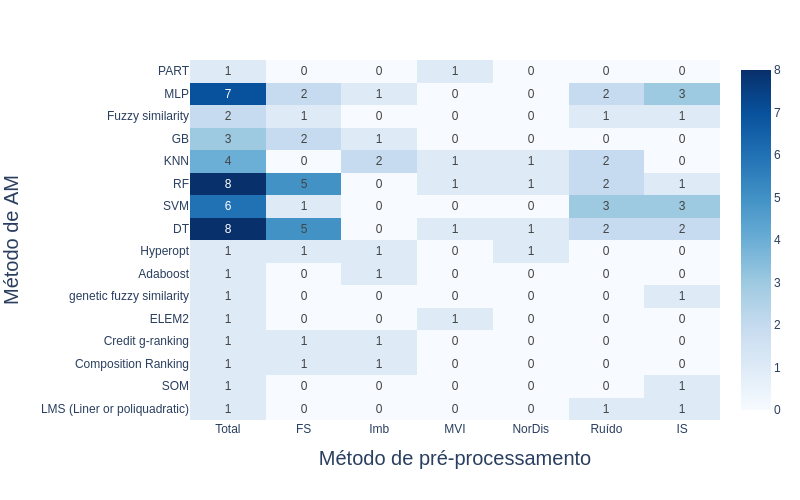

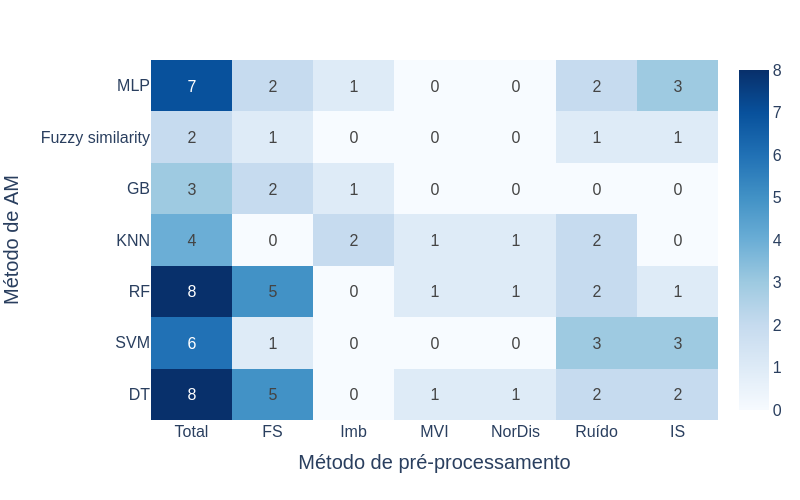

In [4]:
# df = df.set_index('Methods')
df = readMLMethods(sheet_id = '1wPmqZsjJnpbluddY-YEbFYYIKcgJeqxiIDpvMQnTZAo', sheet_name = 'Analise_metodo_metaLearner')
df = df[df['Total'] > 0]
import plotly.express as px
fig = px.imshow(df, text_auto=True, aspect="auto", color_continuous_scale=px.colors.sequential.Blues)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    yaxis=dict(
        title_text="Método de AM",
        titlefont=dict(size=20),
    ),
    xaxis=dict(
        title_text="Método de pré-processamento",
        titlefont=dict(size=20),
    ),
    showlegend=False
)
fig.show(renderer="png", width=800,
    height=500)

df = df[df['Total'] > 1]
fig = px.imshow(df, text_auto=True, aspect="auto", color_continuous_scale=px.colors.sequential.Blues)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    yaxis=dict(
        title_text="Método de AM",
        titlefont=dict(size=20),
    ),
    xaxis=dict(
        title_text="Método de pré-processamento",
        titlefont=dict(size=20),
    ),
    font=dict(
            size=16,
        ),
    showlegend=False
)
fig.show(renderer="png", width=800,
    height=500)

    

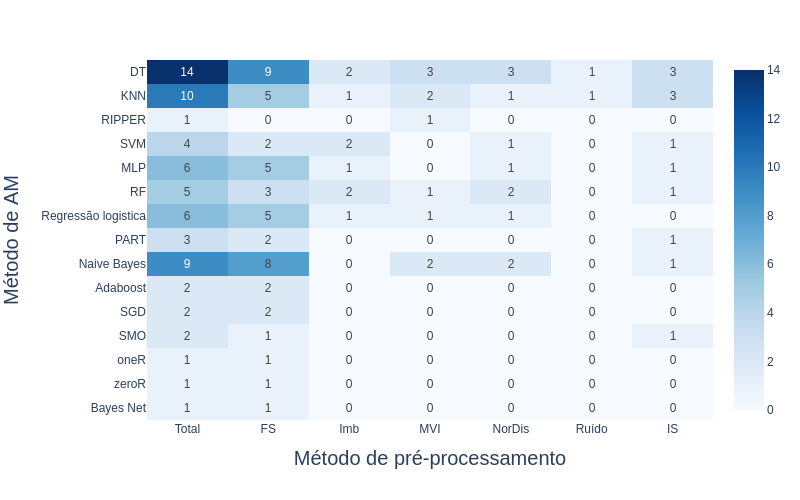

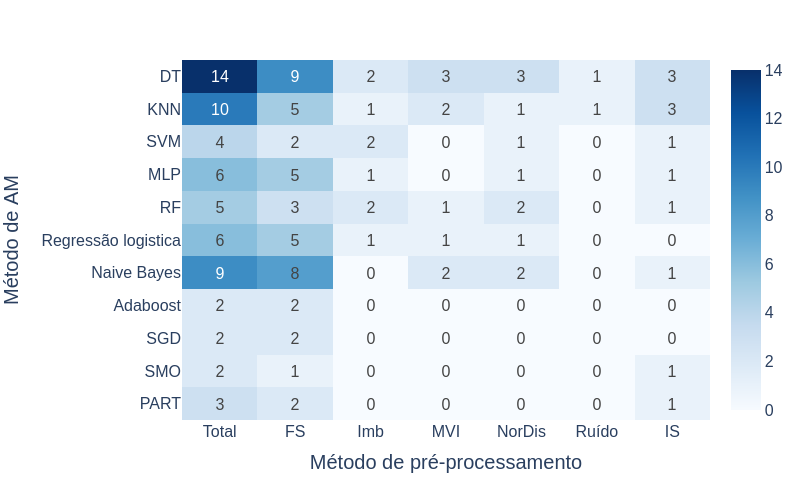

In [5]:
df = readMLMethods(sheet_id = '1wPmqZsjJnpbluddY-YEbFYYIKcgJeqxiIDpvMQnTZAo', sheet_name = 'Analise_metodo_Baselearner')
df = df[df['Total'] > 0]
fig = px.imshow(df, text_auto=True, aspect="auto", color_continuous_scale=px.colors.sequential.Blues)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    yaxis=dict(
        title_text="Método de AM",
        titlefont=dict(size=20),
    ),
    xaxis=dict(
        title_text="Método de pré-processamento",
        titlefont=dict(size=20),
    ),
    showlegend=False
)
fig.show(renderer="png", width=800,
    height=500)

df = df[df['Total'] > 1]
fig = px.imshow(df, text_auto=True, aspect="auto", color_continuous_scale=px.colors.sequential.Blues)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    yaxis=dict(
        title_text="Método de AM",
        titlefont=dict(size=20),
    ),
    xaxis=dict(
        title_text="Método de pré-processamento",
        titlefont=dict(size=20),
    ),
    font=dict(
            size=16,
        ),
    showlegend=False
)
fig.show(renderer="png", width=800,
    height=500)

# Articles Analysis

In [32]:
df_Articles = readArticleData(sheet_id = '1wPmqZsjJnpbluddY-YEbFYYIKcgJeqxiIDpvMQnTZAo', sheet_name = 'Copia_de_Aritgos')
df_Articles_Total = df_Articles[df_Articles.index == 'Total'][['FS','Imbalence','MV','Normalization','Noise','IS']]
df_Articles_Total.columns = ['FS','Imb','MVI','NorDis','Ruído','IS']
# df_Articles_Total['IS'] = df_Articles_Total['IS'] + df_Articles_Total['Noise'] - 1
# df_Articles_Total = df_Articles_Total.drop('Noise', axis=1) 
df_Articles_Questions = df_Articles.iloc[0:37, 2:13]
df_Articles_Questions.columns = ['Q1', 'Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7', 'Q8','Q9', 'Q10', 'Q11']
df_Articles_Questions = df_Articles_Questions[['Q6', 'Q1', 'Q7', 'Q2','Q3', 'Q4', 'Q5', 'Q8','Q9', 'Q10', 'Q11']]
df_Articles_Questions.columns = ['Q1', 'Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7', 'Q8','Q9', 'Q10', 'Q11']
df_Articles_Questions['Sum'] = df_Articles_Questions.sum(axis=1)
df_Articles_Questions_Total = df_Articles_Questions.sum().rename('Total')
df_Articles_Questions_Total.drop('Sum', inplace=True)


In [33]:
# 1. É possível replicar5 o experimento? Q1 = Q6
# 2. Os conjuntos de dados foram apresentados e podem ser reutilizados? Q2 = Q1
# 3. São apresentados os algoritmos de pré-processamento são utilizados? Q3 = Q7
# 4. Foram apresentado as MFe utilizados? Q4 = Q2
# 5. Foi explicado o motivo da escolha das MFe? Q5 = Q3
# 6. O método de MtL é explicado claramente? Q6 = Q4
# 7. Os resultados foram comparados com pesquisas anteriores? Q7 = Q5
# 8. É mostrada a vantagem da a abordagem escolhida? Q8 = Q8
# 9. O artigo realizou análise na meta-base? Q9 = Q9
# 10. O artigo realizou análise no nível meta? Q10 = Q10
# 11. O artigo realizou análise no nível base? Q11 = Q11


# Original
# 1 - Os conjuntos de dados foram apresentados e podem ser reutilizados?
# 2 - Foi apresentado quais meta-features foram utilizados?
# 3 - Foi explicado o porque da escolha dos meta-features?
# 4 - O metodo de meta-learning é explicado claramente?
# 5 - Os resultados foram comparados com pesquisas anteriores?
# 6 - É possivel replicar o experimento? 6->1
# 7 - É apresentado quais algoritmos de pre-processamento são utilizados?
# 8 - É mostrada a vantagem utilizar a abordagem escolhida?
# 9 - O artigo realizou análise na meta-base?
# 10 - O artigo realizaou análise no nível meta?
# 11 - O artigo realizaou análise no nível base?
display(df_Articles_Questions)
display(df_Articles_Questions_Total)
display(df_Articles_Total)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Sum
Artigos,,,,,,,,,,,,
A Provenance Meta Learning Framework for Missing Data Handling Methods Selection,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,8.0
Two-stage optimization for machine learning workflow,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0
Aided Selection of Sampling Methods for Imbalanced Data Classification,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0
A novel meta learning framework for feature selection using data synthesis and fuzzy similarity,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6.0
Feature selection algorithm recommendation for gene expression data through gradient boosting and neural network metamodels,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0
PRESISTANT: Learning based assistant for data pre-processing,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,8.0
Meta-Learning for Resampling Recommendation Systems,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0
PRESISTANT: Data pre-processing assistant,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
Intelligent assistance for data pre-processing,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,7.0


Q1     22.0
Q2     25.0
Q3     35.0
Q4     27.0
Q5     20.0
Q6     31.0
Q7      7.0
Q8     28.0
Q9     16.0
Q10    23.0
Q11    18.0
Name: Total, dtype: float64

,FS,Imb,MVI,NorDis,Ruído,IS
Artigos,,,,,,
Total,18.0,8.0,7.0,6.0,3.0,8.0


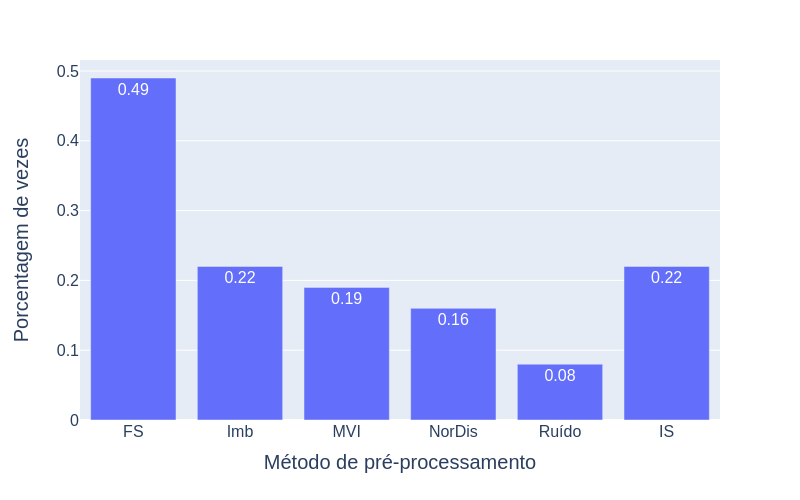

In [34]:
fig = px.bar((round((df_Articles_Total/37), 2)).T, text_auto=True)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    yaxis=dict(
        title_text="Porcentagem de vezes",
        titlefont=dict(size=20),
    ),
    xaxis=dict(
        title_text="Método de pré-processamento",
        titlefont=dict(size=20),
    ),
    font=dict(
            size=16,
        ),
    showlegend=False
)
fig.show(renderer="png")

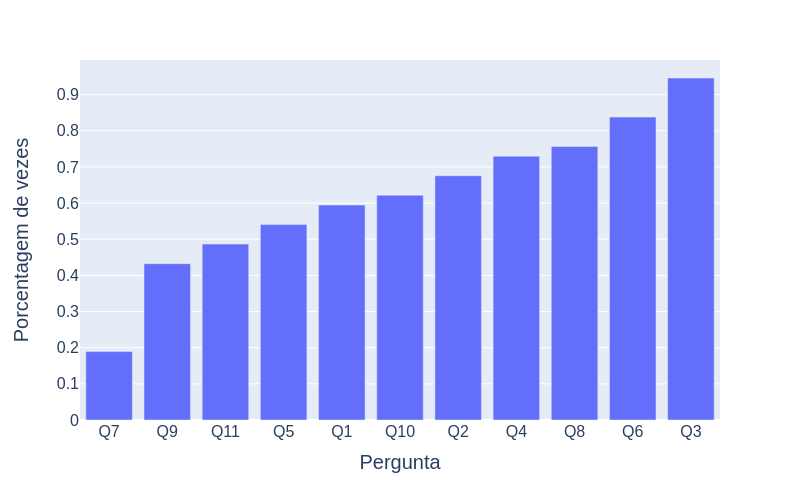

In [14]:
fig = px.bar((df_Articles_Questions_Total/37).sort_values())
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    yaxis=dict(
        title_text="Porcentagem de vezes",
        titlefont=dict(size=20),
    ),
    xaxis=dict(
        title_text="Pergunta",
        titlefont=dict(size=20),
    ),
    font=dict(
            size=16,
        ),
    showlegend=False
)
fig.update_yaxes(automargin=True)
fig.show(renderer="png")

In [15]:
df_Articles_Questions['Sum'].value_counts().sort_index().values

array([1, 2, 1, 7, 6, 7, 4, 3, 4, 2])

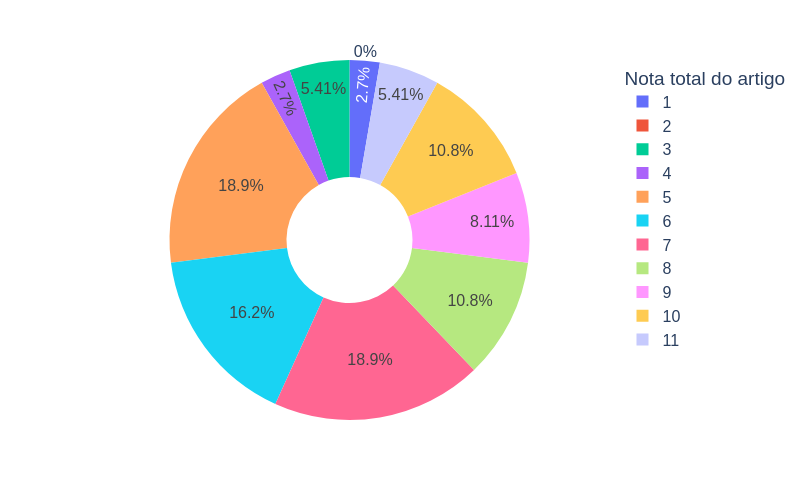

In [16]:
fig = px.pie(df_Articles_Questions['Sum'].value_counts(),
names=['1', '2', '3', '4','5', '6', '7', '8','9', '10', '11'],
# category_orders={'1':1, '2':2, '3':3, '4':4,'5':5, '6':6, '7':7, '8':8,'9':9, '10':10, '11':11},
values = [1, 0, 2, 1, 7, 6, 7, 4, 3, 4, 2],
hole=0.35)
fig.update_layout(legend=dict({'traceorder': 'normal'}
                                              # ticks='inside',
                                              # tickvals=[0, 1, 2],
                                              # ticktext=["0 - Female",
                                              #           "1 - Male",
                                              #           "2 - Undefined"],
                                              # dtick=3
                                              ),
                                              font=dict(
            size=16,
        ),
                                   legend_title_text='Nota total do artigo')
fig.update_traces(sort=False) 
fig.show(renderer="png", width=800,
    height=500)

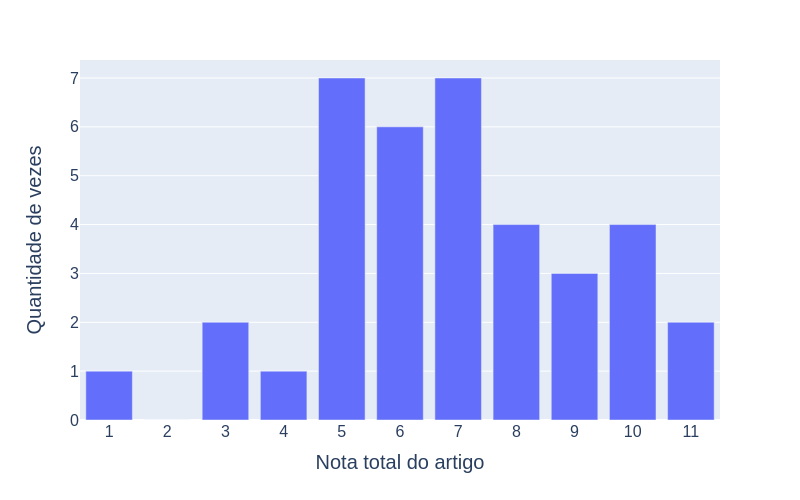

In [17]:
fig = px.bar((df_Articles_Questions['Sum'].value_counts()),
x=['1', '2', '3', '4','5', '6', '7', '8','9', '10', '11'],
y = [1, 0, 2, 1, 7, 6, 7, 4, 3, 4, 2])
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    yaxis=dict(
        title_text="Quantidade de vezes",
        titlefont=dict(size=20),
    ),
    xaxis=dict(
        title_text="Nota total do artigo",
        titlefont=dict(size=20),
        
    ),
    font=dict(
            size=16,
        ),
    showlegend=False
)
fig.show(renderer="png", width=800,
    height=500)


# MF analysis

In [11]:
df_MF

,Acr,Total,FS,Imb,MVI,NorDis,Ruído,IS
MtL,,,,,,,,
Number of classes,nrClass,10.0,4.0,0.0,3.0,1.0,2.0,2.0
Number of features,nrAttr,14.0,7.0,3.0,3.0,1.0,2.0,0.0
Number of numerical features,nrNum,8.0,3.0,1.0,2.0,0.0,2.0,0.0
number of nominal features,nrCat,10.0,4.0,1.0,3.0,1.0,2.0,1.0
Number of examples,nrInst,16.0,8.0,3.0,4.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...
78. Median local scan,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
79. Mode local scan,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
80. Number of groups,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# df_MF = df_MF[df_MF['Total']> 2]
# df_MF.index = df_MF['Acr']
df_MF.sort_values(by='Total', ascending=False)

,Total,FS,Imb,MVI,NorDis,Ruído,IS
Acr,,,,,,,
n4,3.0,1.0,0.0,0.0,0.0,2.0,0.0
n3,3.0,1.0,0.0,0.0,0.0,2.0,0.0
f3,3.0,0.0,1.0,0.0,0.0,2.0,0.0
leaves,3.0,1.0,0.0,0.0,0.0,2.0,0.0
numToCat,3.0,1.0,0.0,1.0,1.0,2.0,0.0
tree_depth,3.0,0.0,1.0,0.0,0.0,2.0,0.0
Conditional entropy,3.0,3.0,0.0,0.0,0.0,0.0,0.0
oneNN,3.0,1.0,0.0,0.0,0.0,2.0,0.0
percentage of missing values,3.0,3.0,0.0,2.0,2.0,0.0,0.0


,meta-feature,Acr,Ocorerncias,Ocorrencias FS,Ocorrencias imbalence,Ocorrencias MV,Ocorrencias Normalization,Ocorrencias Noise,Ocorrencias IS,IS,Type,Type2,2 pre processing method,3 pre processing methods
0,Number of classes,nrClass,10.0,4.0,0.0,3.0,1.0,2.0,2.0,4.0,Simple,Simple,0.0,1.0
1,Number of features,nrAttr,14.0,7.0,3.0,3.0,1.0,2.0,0.0,2.0,Simple,Simple,0.0,1.0
2,Number of numerical features,nrNum,8.0,3.0,1.0,2.0,0.0,2.0,0.0,2.0,Simple,Simple,0.0,0.0
3,number of nominal features,nrCat,10.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,Simple,Simple,0.0,1.0
4,Number of examples,nrInst,16.0,8.0,3.0,4.0,2.0,2.0,1.0,3.0,Simple,Simple,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,78. Median local scan,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Others,Graph,0.0,0.0
265,79. Mode local scan,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Others,Graph,0.0,0.0
266,80. Number of groups,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Others,Graph,0.0,0.0
267,81. Modularity,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Others,Graph,0.0,0.0


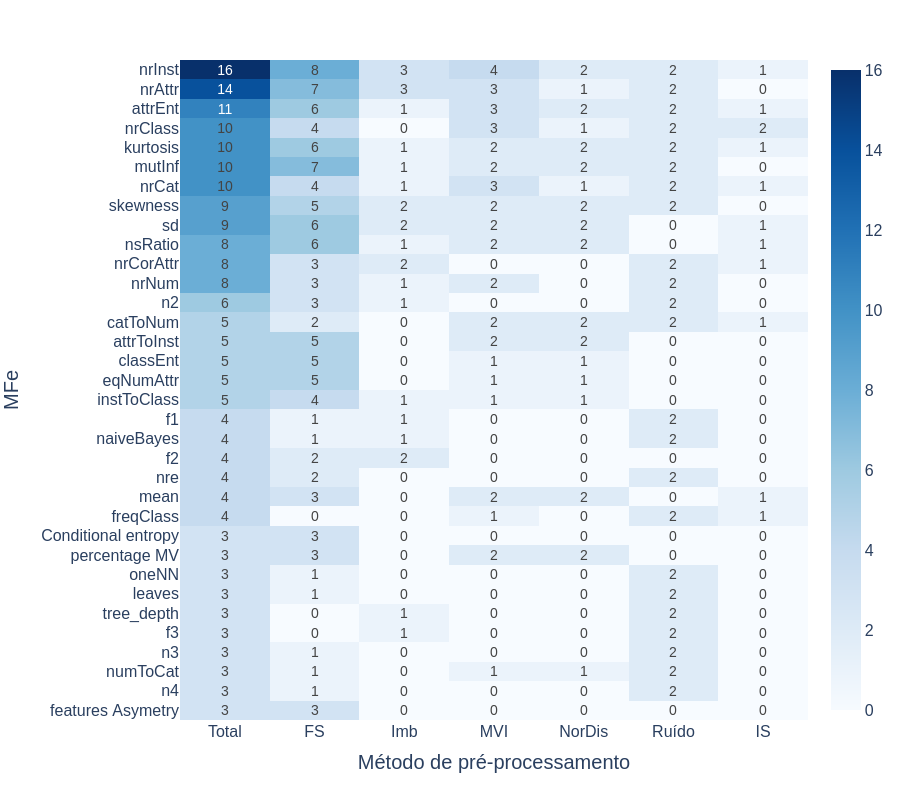

In [24]:
df_MF = readMFList(sheet_id = '1wPmqZsjJnpbluddY-YEbFYYIKcgJeqxiIDpvMQnTZAo', sheet_name = 'Copia_Meta_features')
# display(df_MF)
df_MF = df_MF[df_MF['Total']> 2]
df_MF.index = df_MF['Acr']
df_MF.drop(['Type',	'Type2',	'2prep',	'3prep', 'Acr'], axis = 1, inplace=True)
fig = px.imshow(df_MF.sort_values(by='Total', ascending=False), text_auto=True, aspect="auto", color_continuous_scale=px.colors.sequential.Blues)
fig.update_yaxes(automargin='left+top')
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    yaxis=dict(
        title_text="MFe",
        titlefont=dict(size=20),
    ),
    xaxis=dict(
        title_text="Método de pré-processamento",
        titlefont=dict(size=20),
    ),
    font=dict(
            size=16,
        ),
)
fig.show(renderer="png", width=900,
    height=800)


# PreProcessing analysis

In [23]:
df = readPreProMethods(sheet_id = '1wPmqZsjJnpbluddY-YEbFYYIKcgJeqxiIDpvMQnTZAo', sheet_name = 'Analise_pre_proc')
df = df[df['Total'] > 1]
# fig = px.imshow(df, text_auto=True, aspect="auto")
# fig.show(renderer="svg", width=800,
#     height=500)
display(df)
df_Imb = df[df['Imb'] > 0]
display(df_Imb)
df_FS = df[df['FS'] > 0]
display(df_FS)
df_MV = df[df['MVI'] > 0]
display(df_MV)
df_NorDis = df[df['NorDis'] > 0]
display(df_NorDis)
df_IS = df[df['IS'] > 0]
display(df_IS)
df_Noise = df[df['Ruído'] > 0]
display(df_Noise)




,Total,FS,Imb,MVI,NorDis,Ruído,IS
Algoritmo,,,,,,,
KNNI,2.0,0.0,0.0,2.0,0.0,0.0,0.0
MMI,3.0,0.0,0.0,3.0,0.0,0.0,0.0
Replace missing values,2.0,0.0,0.0,2.0,0.0,0.0,0.0
ROS,3.0,0.0,3.0,0.0,0.0,0.0,0.0
SMOTE,4.0,0.0,4.0,0.0,0.0,0.0,0.0
RUS,6.0,0.0,6.0,0.0,0.0,0.0,0.0
NearMiss- 1,3.0,0.0,3.0,0.0,0.0,0.0,0.0
NearMiss-3,2.0,0.0,2.0,0.0,0.0,0.0,0.0
Tomek-links,2.0,0.0,2.0,0.0,0.0,0.0,0.0


,Total,FS,Imb,MVI,NorDis,Ruído,IS
Algoritmo,,,,,,,
ROS,3.0,0.0,3.0,0.0,0.0,0.0,0.0
SMOTE,4.0,0.0,4.0,0.0,0.0,0.0,0.0
RUS,6.0,0.0,6.0,0.0,0.0,0.0,0.0
NearMiss- 1,3.0,0.0,3.0,0.0,0.0,0.0,0.0
NearMiss-3,2.0,0.0,2.0,0.0,0.0,0.0,0.0
Tomek-links,2.0,0.0,2.0,0.0,0.0,0.0,0.0
ENN,5.0,0.0,3.0,0.0,0.0,0.0,2.0
CNN,4.0,0.0,2.0,0.0,0.0,0.0,2.0
AENN,4.0,0.0,1.0,0.0,0.0,2.0,1.0


,Total,FS,Imb,MVI,NorDis,Ruído,IS
Algoritmo,,,,,,,
PCA,3.0,3.0,0.0,0.0,0.0,0.0,0.0
ReliefF,6.0,6.0,0.0,0.0,0.0,0.0,0.0
MIFS,2.0,2.0,0.0,0.0,0.0,0.0,0.0
Fisher-score,3.0,3.0,0.0,0.0,0.0,0.0,0.0
Chi2,2.0,2.0,0.0,0.0,0.0,0.0,0.0
CFS,6.0,6.0,0.0,0.0,0.0,0.0,0.0
InfoGain,2.0,2.0,0.0,0.0,0.0,0.0,0.0
CBF,4.0,4.0,0.0,0.0,0.0,0.0,0.0
Sequential backward search (SBS),3.0,3.0,0.0,0.0,0.0,0.0,0.0


,Total,FS,Imb,MVI,NorDis,Ruído,IS
Algoritmo,,,,,,,
KNNI,2.0,0.0,0.0,2.0,0.0,0.0,0.0
MMI,3.0,0.0,0.0,3.0,0.0,0.0,0.0
Replace missing values,2.0,0.0,0.0,2.0,0.0,0.0,0.0


,Total,FS,Imb,MVI,NorDis,Ruído,IS
Algoritmo,,,,,,,
nominal to binary,3.0,0.0,0.0,0.0,3.0,0.0,0.0
standalization,3.0,0.0,0.0,0.0,3.0,0.0,0.0
Discretization,3.0,0.0,0.0,0.0,3.0,0.0,0.0


,Total,FS,Imb,MVI,NorDis,Ruído,IS
Algoritmo,,,,,,,
ENN,5.0,0.0,3.0,0.0,0.0,0.0,2.0
CNN,4.0,0.0,2.0,0.0,0.0,0.0,2.0
AENN,4.0,0.0,1.0,0.0,0.0,2.0,1.0
coreHYB,2.0,0.0,0.0,0.0,0.0,0.0,2.0
Cpruner,3.0,0.0,0.0,0.0,0.0,0.0,3.0
DROP3,2.0,0.0,0.0,0.0,0.0,0.0,2.0
IB3,3.0,0.0,0.0,0.0,0.0,0.0,3.0
ICF,3.0,0.0,0.0,0.0,0.0,0.0,3.0


,Total,FS,Imb,MVI,NorDis,Ruído,IS
Algoritmo,,,,,,,
HARF,2.0,0.0,0.0,0.0,0.0,2.0,0.0
SEF,2.0,0.0,0.0,0.0,0.0,2.0,0.0
DEF,2.0,0.0,0.0,0.0,0.0,2.0,0.0
Pruned SF,2.0,0.0,0.0,0.0,0.0,2.0,0.0
AENN,4.0,0.0,1.0,0.0,0.0,2.0,1.0


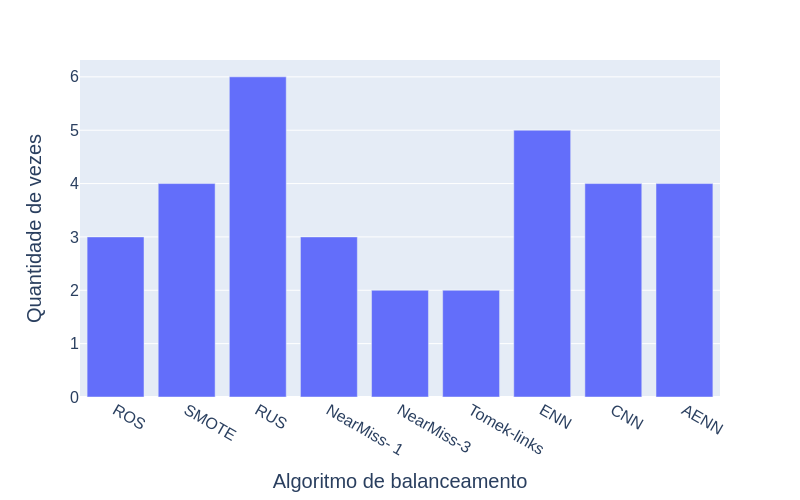

In [25]:
fig = px.bar(df_Imb['Total'])
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    yaxis=dict(
        title_text="Quantidade de vezes",
        titlefont=dict(size=20),
    ),
    xaxis=dict(
        title_text="Algoritmo de balanceamento",
        titlefont=dict(size=20),
    ),
    font=dict(
            size=16,
        ),
    showlegend=False
)
fig.show(renderer='png')

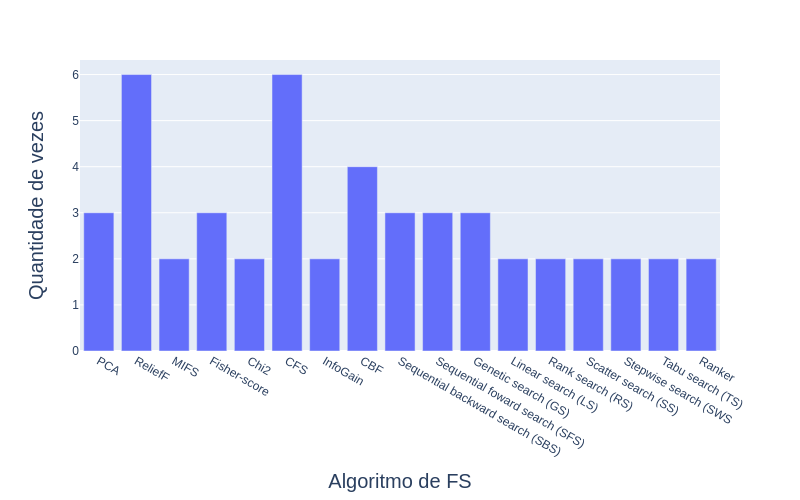

In [28]:
fig = px.bar(df_FS['Total'])
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    yaxis=dict(
        title_text="Quantidade de vezes",
        titlefont=dict(size=20),
    ),
    xaxis=dict(
        title_text="Algoritmo de FS",
        titlefont=dict(size=20),
    ),
    showlegend=False
)
fig.show(renderer='png')


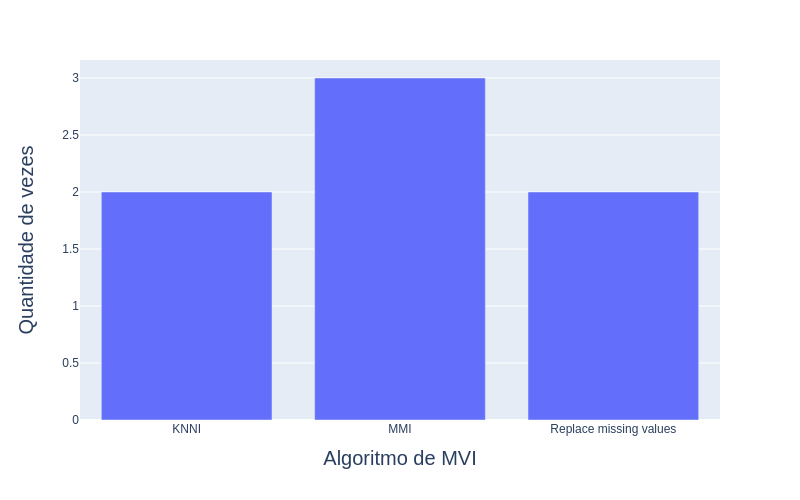

In [72]:
fig = px.bar(df_MV['Total'])
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    yaxis=dict(
        title_text="Quantidade de vezes",
        titlefont=dict(size=20),
    ),
    xaxis=dict(
        title_text="Algoritmo de MVI",
        titlefont=dict(size=20),
    ),
    showlegend=False
)
fig.show(renderer='png')

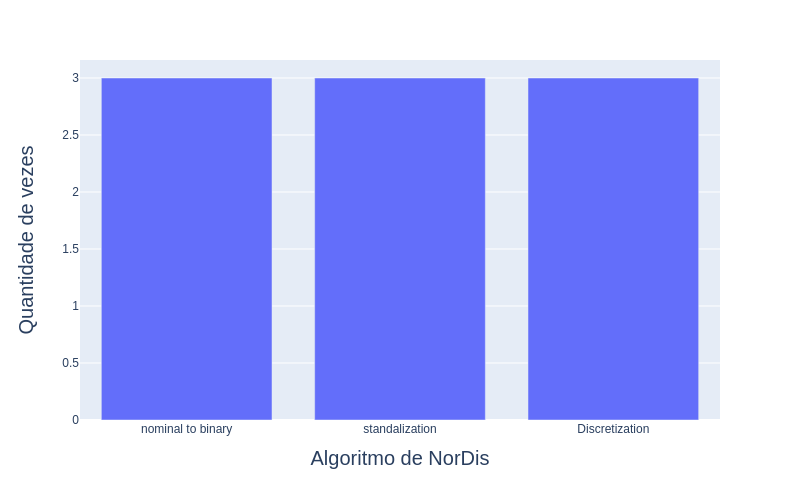

In [73]:
fig = px.bar(df_NorDis['Total Quantity'])
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    yaxis=dict(
        title_text="Quantidade de vezes",
        titlefont=dict(size=20),
    ),
    xaxis=dict(
        title_text="Algoritmo de NorDis",
        titlefont=dict(size=20),
    ),
    showlegend=False
)
fig.show(renderer='png')

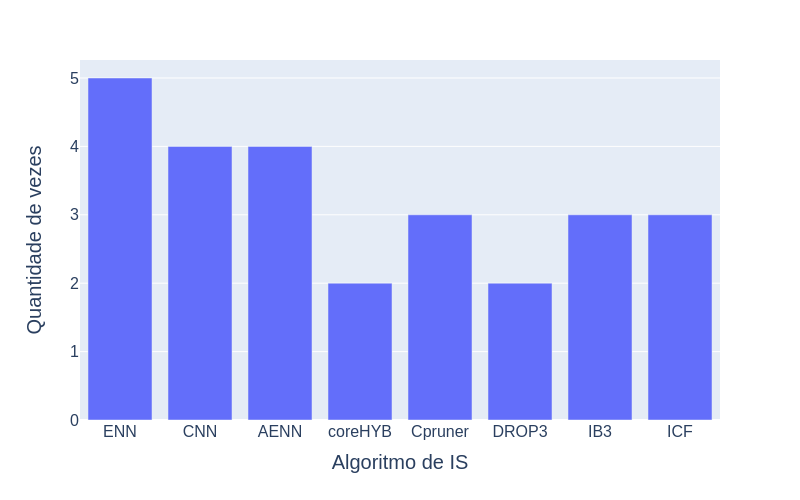

In [30]:
fig = px.bar(df_IS['Total'])
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    yaxis=dict(
        title_text="Quantidade de vezes",
        titlefont=dict(size=20),
    ),
    xaxis=dict(
        title_text="Algoritmo de IS",
        titlefont=dict(size=20),
    ),
    font=dict(
            size=16,
        ),
    showlegend=False
)
fig.show(renderer='png')

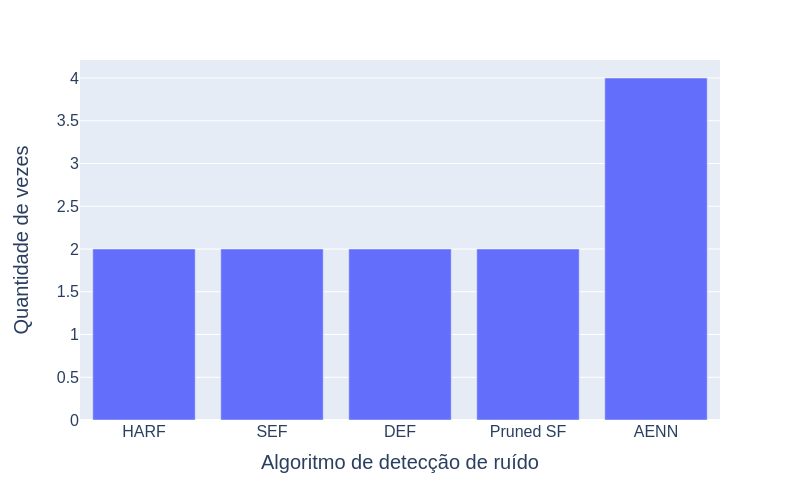

In [31]:
fig = px.bar(df_Noise['Total'])
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    yaxis=dict(
        title_text="Quantidade de vezes",
        titlefont=dict(size=20),
    ),
    xaxis=dict(
        title_text="Algoritmo de detecção de ruído",
        titlefont=dict(size=20),
    ),
    font=dict(
            size=16,
        ),
    showlegend=False
)
fig.show(renderer='png')